# **Business Understanding**

## Problem statement

Transaksi perbankan rentan terhadap aktivitas penipuan (fraud) seperti penggunaan akun tanpa izin, transaksi palsu, pencucian uang, atau penyalahgunaan akun. Kejadian fraud biasanya jarang (rare event) sehingga sulit terdeteksi secara manual dan dapat menyebabkan:

* Kerugian finansial bagi bank dan nasabah
* Kerusakan reputasi bank
* Meningkatnya biaya operasional untuk investigasi fraud

Bank membutuhkan sistem otomatis yang bisa **mendeteksi transaksi abnormal** secara **real-time** atau hampir real-time.

## Objectives / target kinerja model

## Business success criteria

1. Model mampu mengidentifikasi >85% transaksi abnormal yang terkonfirmasi fraud setelah validasi manual
2. Mengurangi kerugian fraud dalam jangka panjang
3. Daftar suspicious transaction mudah dipahami analis fraud

# **Data Understanding**

## Cek sumber data

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()


Saving bank_transactions_data_2.csv to bank_transactions_data_2.csv


{'bank_transactions_data_2.csv': b'TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate\r\nTX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08\r\nTX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35\r\nTX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04\r\nTX000004,AC00070,184.5,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06\r\nTX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,,Student,198.0,1.0,7429.4,2024-11-04 08:06:39\r\nTX000006,AC00393,92.15,2

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d valakhorasani/bank-transaction-dataset-for-fraud-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
!unzip bank-transaction-dataset-for-fraud-detection.zip


unzip:  cannot find or open bank-transaction-dataset-for-fraud-detection.zip, bank-transaction-dataset-for-fraud-detection.zip.zip or bank-transaction-dataset-for-fraud-detection.zip.ZIP.


In [34]:
import pandas as pd

In [20]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [21]:
catalog


'data_raw': kedro_datasets.pandas.csv_dataset.CSVDataset
'data_cleaned': kedro_datasets.pandas.parquet_dataset.ParquetDataset
'skewnes_check_fig': kedro_datasets.matplotlib.matplotlib_writer.MatplotlibWriter
'outliers_check_fig': kedro_datasets.matplotlib.matplotlib_writer.MatplotlibWriter
'transaction_type_bar_fig': kedro_datasets.matplotlib.matplotlib_writer.MatplotlibWriter
'channel_bar_fig': kedro_datasets.matplotlib.matplotlib_writer.MatplotlibWriter
'location_bar_fig': kedro_datasets.matplotlib.matplotlib_writer.MatplotlibWriter
'customer_occupation_bar_fig': kedro_datasets.matplotlib.matplotlib_writer.MatplotlibWriter
'korelasi_heatmap_fig': kedro_datasets.matplotlib.matplotlib_writer.MatplotlibWriter
'final_preprocessed_df': kedro_datasets.pandas.parquet_dataset.ParquetDataset
'modeling_kmedoids': kedro_datasets.pandas.parquet_dataset.ParquetDataset
'kmedoids_model': kedro_datasets.pickle.pickle_dataset.PickleDataset
'interpretasi_cluster': kedro_datasets.text.text_dataset.Tex

In [22]:
%reload_ext kedro.ipython

[11/26/25 05:42:00] INFO     Registered line magic '%reload_kedro'                                   ]8;id=981948;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=992492;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=554418;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=622180;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=841539;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=316550;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /home/ayam/projekan_porto/zenitra-project-transaction-fraud.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=862455;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=166691;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/26/25 05:42:02] INFO     Kedro project zenitra-project-transaction-fraud                        ]8;id=237356;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=847548;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=379935;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=299695;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=876768;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=550216;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/ipython/__init__.py#153\153]8;;\

In [23]:
df = catalog.load("data_raw_fraud")
df.head()

[11/26/25 05:42:05] INFO     Loading data from data_raw_fraud (CSVDataset)...                  ]8;id=563230;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=847560;file:///home/ayam/miniconda3/envs/porto-bank-transaction-cluster/lib/python3.11/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

## Analisis awal: missing value, distribusi, outlier

In [25]:
df.shape

(2512, 16)

In [26]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [27]:
df.duplicated().sum()

0

In [28]:
df.isnull().sum()


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

## data cleaning

In [29]:
df = df.dropna()
df = df.drop_duplicates()
df.shape

(2512, 16)

In [30]:
df.isnull().sum()


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [31]:
df.isna().sum()


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [32]:
df.duplicated().sum()

0

### formatting data to datetime

In [35]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["PreviousTransactionDate"] = pd.to_datetime(df["PreviousTransactionDate"])
df.dtypes


TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object

In [37]:
df.shape

(2512, 16)

# **Data Preparation**

## **EDA**

In [51]:
df_numeric = df.select_dtypes(include=["float64", "int64"])
df_categorical = df.select_dtypes(include=["object"])

### **Univariate analysis(numerik fitur)**

In [52]:
df_numeric.shape

(2512, 5)

In [54]:
df_numeric = df_numeric.drop(columns=["LoginAttempts"])

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
df_numeric.columns


Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'AccountBalance'],
      dtype='object')

#### **Distribusi / sebaran nilai**

<function show at 0x7171904a37e0>

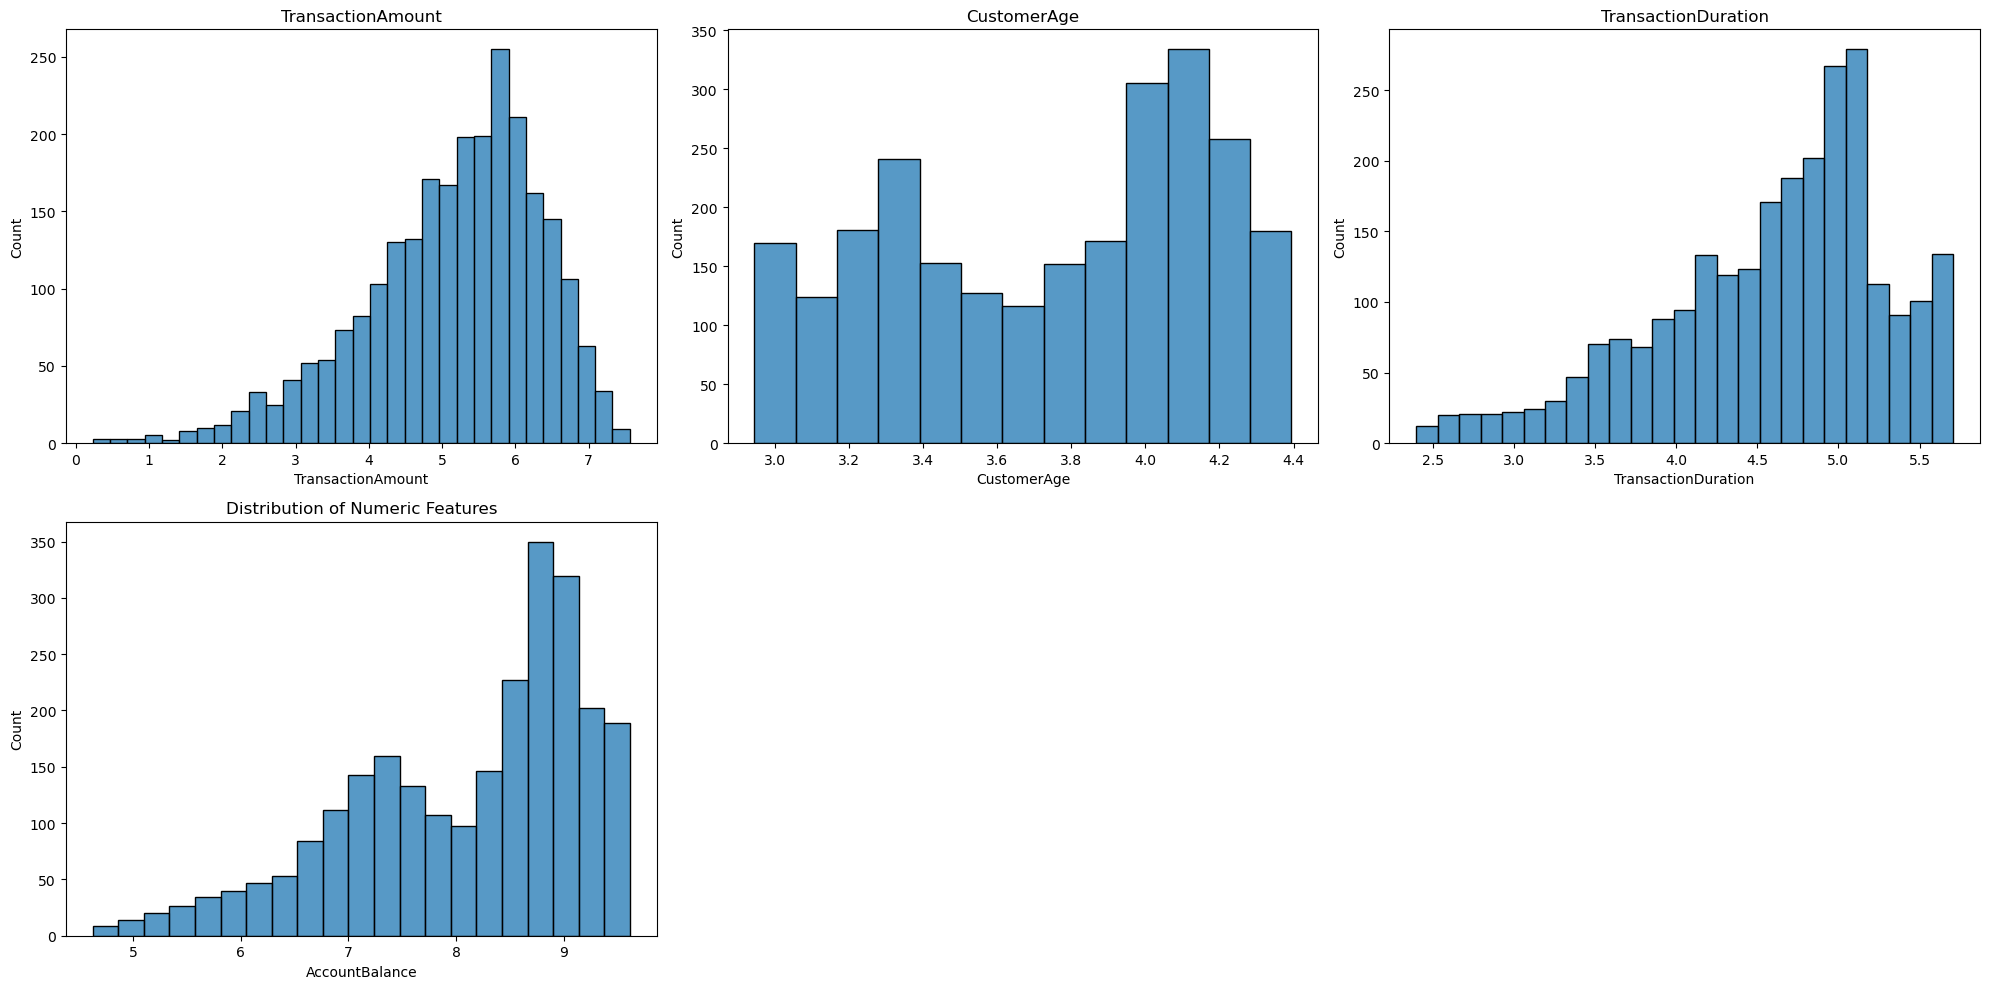

In [57]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(df_numeric.columns):
    ax = fig.add_subplot(2, 3, i + 1)
    sns.histplot(x=np.log1p(df_numeric[col]), ax=ax)
    ax.set_title(col)
plt.title("Distribution of Numeric Features")
plt.tight_layout()
plt.show

#### **Statistik deskriptif**

In [46]:
df_numeric["TransactionAmount"].describe()


count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


1. Trasaction Amount (kurs dolar)
    - Median lebih kecil dari mean → ada transaksi besar yang menarik mean ke atas.

    - Rentang luas: 0.26 – 1919 → distribusi right-skewed (condong ke high value).

    - 50% transaksi berada di 81 – 414 USD → mayoritas transaksi berada di kelas menengah.

    - Artinya dataset tidak normal / Gaussian, lebih cocok dianggap positively skewed.

In [47]:
df_numeric["CustomerAge"].describe()


count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64

2. pola distribusi untuk column age customer
    - Median ≈ Mean (45 ≈ 44.67) → distribusi relatif seimbang / simetris (tidak terlalu skewed).

    - Tidak ada nilai ekstrem yang aneh: 18 – 80 tahun masih normal untuk data bank.

    - Variasi umur besar (std ≈ 18 tahun), berarti dataset mencakup:

        - Gen Z / Milenial (18–35)

        - Gen X (35–55)

        - Baby boomer (55+)

    - Kelompok dominan: usia menengah (35–60 tahun) → paling aktif secara finansial.

    - Kelompok muda (<30): sekitar 25% → mungkin lebih banyak mobile banking / e-wallet.

    - Kelompok senior (>60): ada tapi tidak terlalu besar → bisa terkait investasi/pensiun.

In [48]:
df["TransactionDuration"].describe()


count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64

3. pola distribusi column transaction duration
    - Median ≈ Mean → distribusi cukup simetris (tidak terlalu condong).

    - Rentang 10 – 300 detik masih sangat normal untuk sistem banking.

    - Tidak ada nilai yang terlihat “error data” (misal 0 detik atau 3000 detik).

    - Walaupun variansinya besar (std ≈ 70 detik), masih dalam batas yang masuk akal untuk transaksi finansial.

In [49]:
df_numeric["AccountBalance"].describe()


count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64

4. pola distribusi column account balance
    - Median (4735.51) sedikit lebih kecil dari mean (5114.30) → distribusi sedikit skew ke kanan, artinya ada nasabah saldo sangat besar yang mendorong rata-rata naik.

    - Range besar: 101 – 14,978 → dataset terdiri dari nasabah berdaya beli rendah–tinggi.

    - Tidak ada anomali nilai negatif / nol → data valid, tidak perlu cleaning.

#### **check outliers**

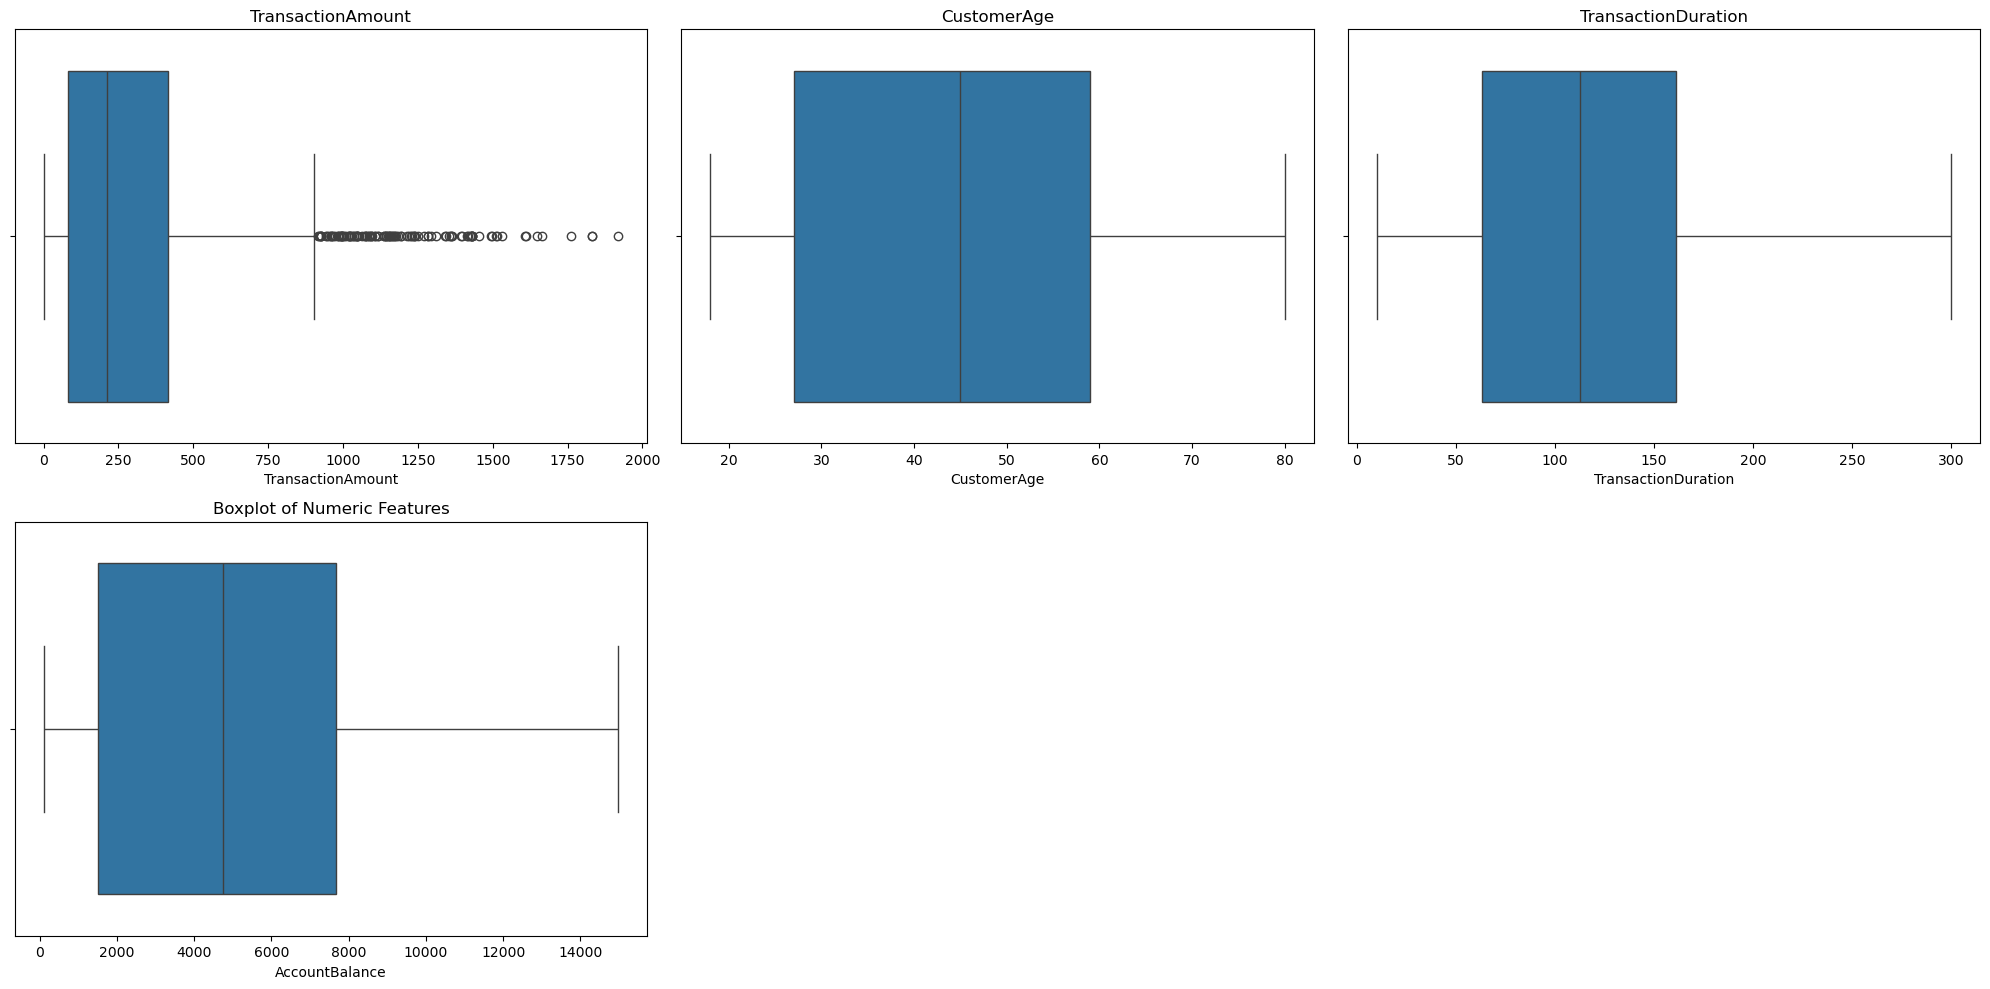

In [58]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(df_numeric.columns):
    ax = fig.add_subplot(2, 3, i + 1)
    sns.boxplot(x=df_numeric[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.title("Boxplot of Numeric Features")
plt.show()

1. TransactionAmount

* Distribusi **sangat skew ke kanan (right-skewed)**.
* Terlihat **banyak outlier** di area **>1000 USD hingga ~1900 USD**.
* Nilai *median* jauh di bawah range outlier → mayoritas transaksi bernilai kecil–menengah.
* **Outlier tidak berarti error**, melainkan transaksi besar (natural dalam data finansial).

**Insight**

* Pola umum: transaksi kecil lebih sering daripada transaksi besar.

---

2. CustomerAge

* Distribusi **simetris**, **tanpa outlier ekstrem**.
* Penyebaran seimbang dari usia 18 – 80.
* Median berada hampir di tengah boxplot → dataset “sehat” untuk fitur usia.

**Insight**

* Umur tidak menimbulkan noise.
* Tidak perlu normalisasi spesial kecuali scaling untuk modelling.

---

3. TransactionDuration

* Distribusi cenderung **simetris tetapi agak melebar**.
* Hampir tidak ada outlier ekstrem.
* Range 10 – 300 detik terlihat wajar untuk sistem perbankan.

**Insight**

* Durasi transaksi bisa membedakan perilaku user normal vs fraud (sangat cepat atau sangat lambat).
* Fitur lebih cocok untuk **pola temporal** daripada outlier detection.

---

4. AccountBalance

* Distribusi **right-skewed** secara signifikan.
* Ada **nilai saldo tinggi** yang menjadi **outlier (hingga ~14978 USD)**.
* Mayoritas saldo berada di sekitar 1,5K – 7,7K.

**Insight**

* Outlier di saldo biasanya bukan error — justru nasabah premi.
* Korelasi antara saldo besar + transaksi kecil berulang bisa indikasi fraud layering.

---

5. saran fitur turunan untuk feature enginerring:

```python
df["amount_ratio_to_balance"] = df["TransactionAmount"] / df["AccountBalance"]
df["is_high_amount"] = df["TransactionAmount"] > df["TransactionAmount"].quantile(0.75)
df["is_long_duration"] = df["TransactionDuration"] > 180
df["is_micro_amount"] = df["TransactionAmount"] < 1
```


#### **modality check**

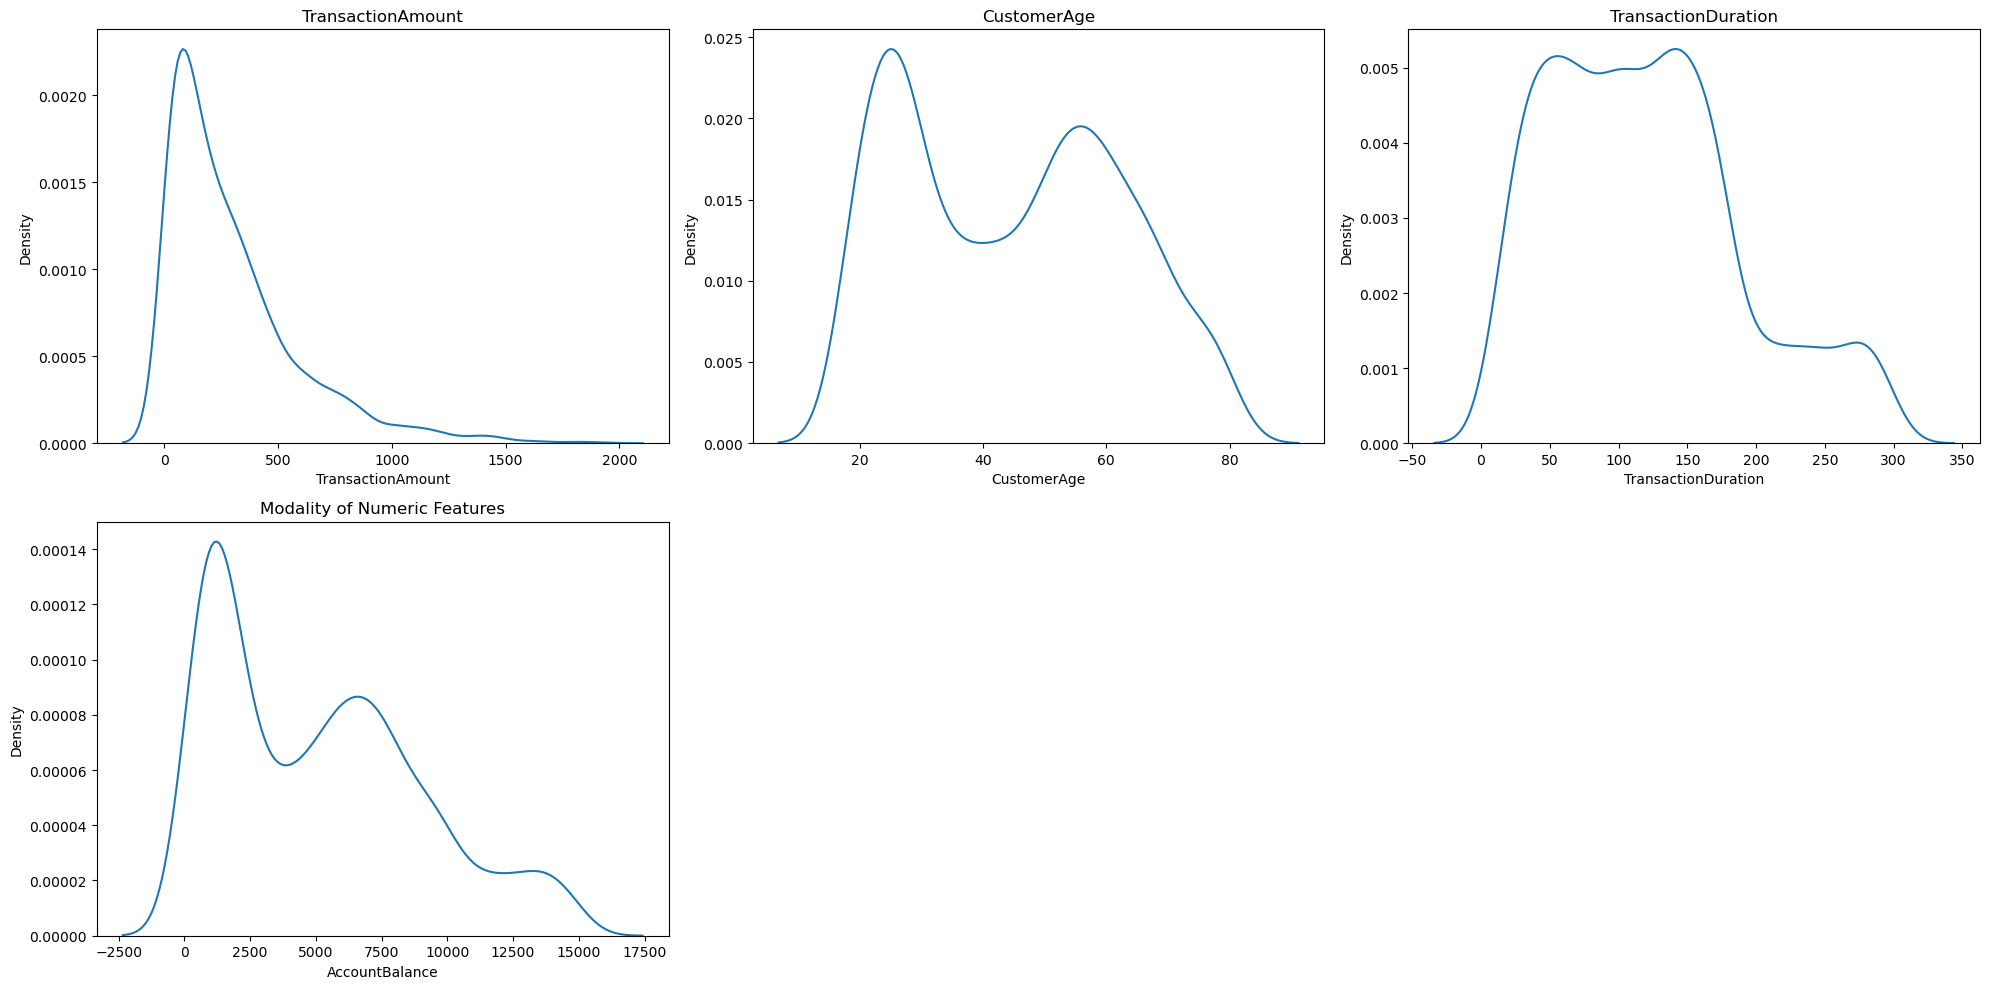

In [59]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(df_numeric.columns):
    ax = fig.add_subplot(2, 3, i + 1)
    sns.kdeplot(df_numeric[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.title("Modality of Numeric Features")
plt.show()

1. TransactionAmount

* **Right-skewed** (ekor panjang ke kanan).
* Puncak padat di sekitar **0 – 200 USD**, lalu menurun perlahan hingga **>2000 USD**.
* Ini pola transaksi finansial yang **normal**: mayoritas transaksi kecil–menengah, sebagian kecil transaksi besar.

**Wawasan**

* Konsumen biasa → transaksi kecil dan rutin.
* Transaksi besar jarang → bisa jadi ciri user VIP *atau* aktivitas mencurigakan (bergantung pola lain).

---

2. CustomerAge

* Terlihat **bimodal (dua puncak)**:

  * Puncak pertama umur **20–30**
  * Puncak kedua umur **50–60**
* Mungkin ada **2 segmen utama nasabah**:

  * Anak muda/pengguna aktif digital
  * Orang tua dengan dana lebih besar

**Wawasan**

* Bimodalitas bisa berguna untuk clustering.
* Jika fraud cenderung terjadi di kelompok umur tertentu → sinyal strong.

---

3. TransactionDuration

* Distribusi **cukup lebar**, puncak sekitar **60–150 detik**.
* Ada ekor panjang hingga **>300 detik**.
* Variasi durasi mengindikasikan **perbedaan perilaku pengguna**.

**Wawasan**

* Durasi ekstrim (terlalu cepat atau terlalu lama) bisa jadi indikator automation (bot) atau social engineering.

---

4. AccountBalance

* **Sangat right-skewed**.
* Terlihat **multi-modal**:

  * Puncak besar di saldo sekitar **1.5K**
  * Puncak kecil sekitar **6–7K**
  * Ekor panjang sampai **15K**
* Ini menandakan **heterogenitas nasabah** (bukan 1 populasi homogen).

**Wawasan**

* Kelompok saldo berbeda kemungkinan punya perilaku transaksi berbeda.
* Kombinasi **saldo besar + transaksi kecil berulang** sangat sering muncul dalam kasus money laundering (layering).

---


#### **Zero-inflation check**

In [62]:
for col in df_numeric.columns:
    zero_ratio = (df_numeric[col] == 0).mean()
    print(col, zero_ratio)

TransactionAmount 0.0
CustomerAge 0.0
TransactionDuration 0.0
AccountBalance 0.0


#### **Skewness & kurtosis check**

In [63]:
for col in df_numeric.columns:
    skew_val = df_numeric[col].skew()
    kurt_val = df_numeric[col].kurt()
    print(col, skew_val, kurt_val)

TransactionAmount 1.7401067216605806 3.6430210570352446
CustomerAge 0.14786438083389342 -1.224194527850897
TransactionDuration 0.5994318037221608 -0.25867966593391367
AccountBalance 0.6012012313034707 -0.5647662884859539


### **univariate analysis (categorical features)**

In [64]:
df_categorical.shape

(2512, 9)

In [65]:
df_categorical.columns


Index(['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID',
       'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation'],
      dtype='object')

In [66]:
df_categorical = df_categorical.drop(["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"], axis=1)

In [67]:
df_categorical.shape

(2512, 4)

In [68]:
df_categorical.columns

Index(['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], dtype='object')

#### **Hitung frekuensi & proporsi per kategori**

In [71]:
def hit_freq_prop(df: pd.DataFrame):
    for col in df.columns:
        df1 = df[col].value_counts()
        df2 =df[col].value_counts(normalize=True) * 100
        print("column :", col, "\n", df1, "\n", df2)
        print("====================================")


hit_freq_prop(df_categorical)


column : TransactionType 
 TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64 
 TransactionType
Debit     77.388535
Credit    22.611465
Name: proportion, dtype: float64
column : Location 
 Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Tucson              67
Philadelphia        67
Omaha               65
Miami               64
Detroit             63
Houston             63
Memphis             63
Denver              62
Kansas City         61
Boston              61
Mesa                61
Atlanta             61
Seattle             61
Colorado Springs    60
Jacksonville        60
Fresno              60
Chicago             60
Austin              59
San Jose            59
Raleigh             59
San Antonio         59
San Diego           59
Indianapolis        58
New York            58
San Francisco       57
Nashville           55
Milwaukee           55
Las Vegas           55
Virginia Beach      55
Phoenix             55

#### **Cek jumlah kategori unik**

In [72]:
def cek_unique(df: pd.DataFrame):
    for col in df.columns:
        df1 = df[col].unique()
        print("column :", col, "\n", df1)
        print("====================================")


cek_unique(df_categorical)


column : TransactionType 
 ['Debit' 'Credit']
column : Location 
 ['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']
column : Channel 
 ['ATM' 'Online' 'Branch']
column : CustomerOccupation 
 ['Doctor' 'Student' 'Retired' 'Engineer']


#### **Visualisasi distribusi kategori**

<function show at 0x7171904a37e0>

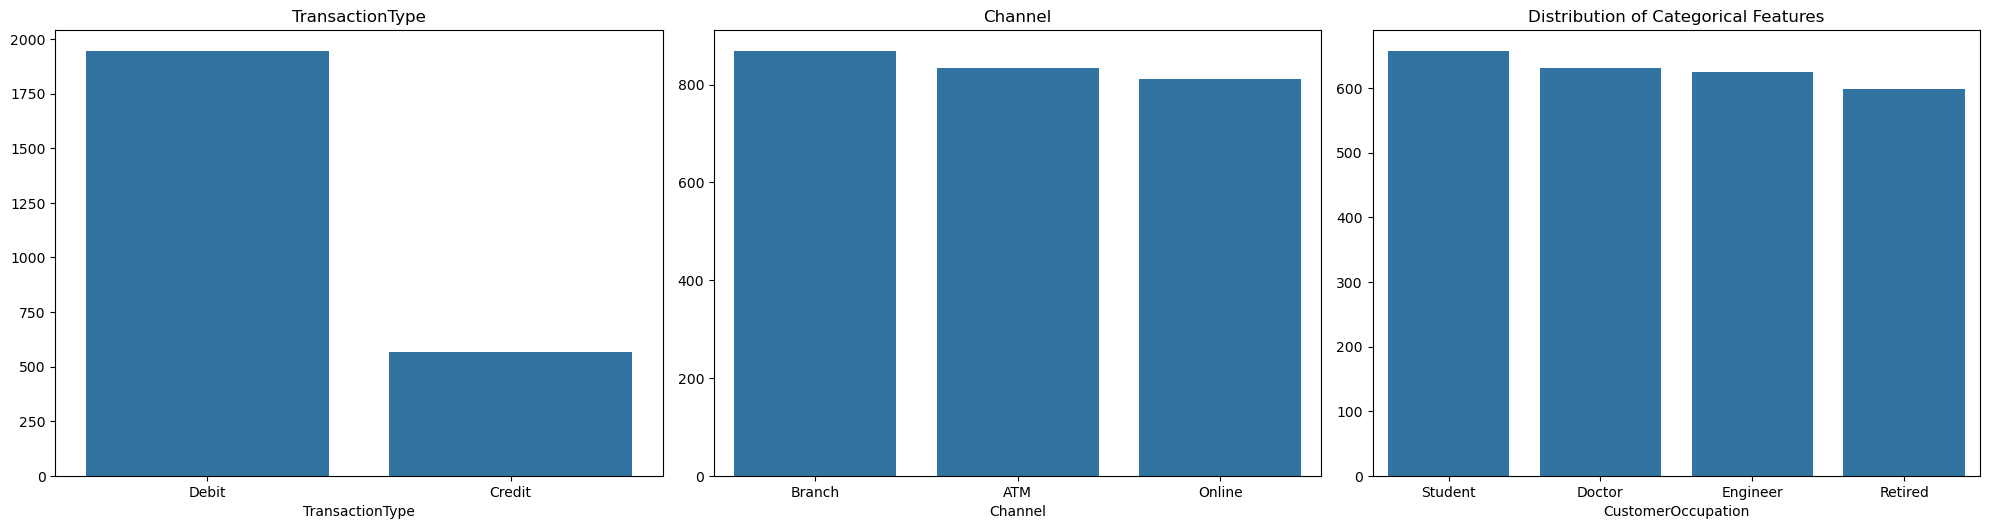

In [74]:
df_categorical2 = df_categorical.copy()
df_categorical2 = df_categorical.drop(["Location"], axis=1)
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(df_categorical2.columns):
    ax = fig.add_subplot(2, 3, i + 1)
    sns.barplot(x=df_categorical2[col].value_counts().index[:10],
                y=df_categorical2[col].value_counts().values[:10])
    ax.set_title(col)
plt.tight_layout()
plt.title("Distribution of Categorical Features")
plt.show

fitur yang lain mungkin lebih seimbang, fitur transaction type tidak balance, ada gap besar antara debit dan credit

<function show at 0x7171904a37e0>

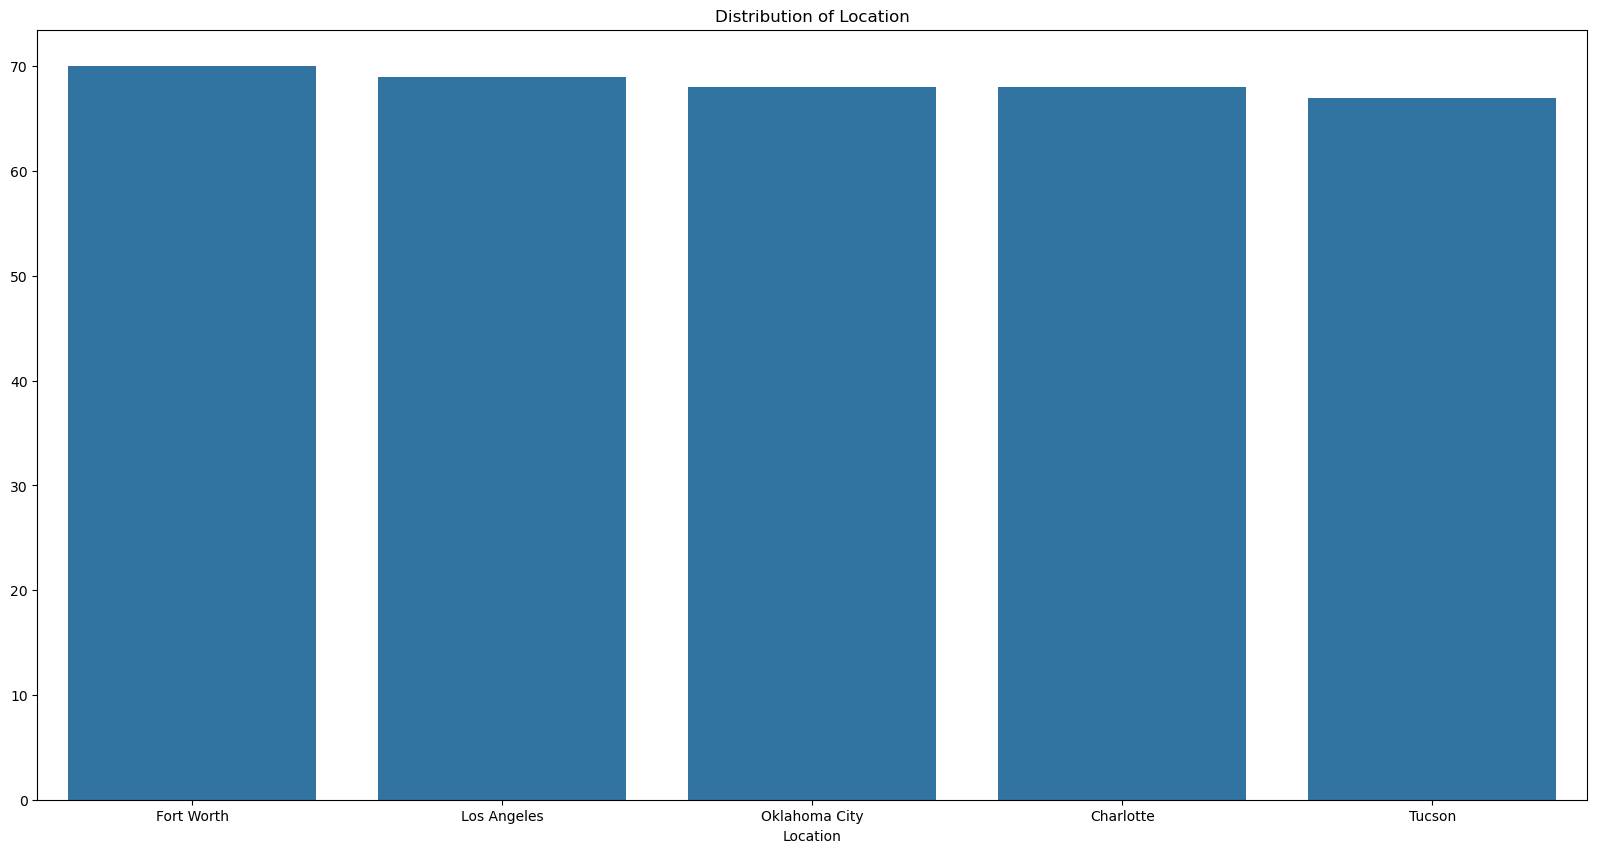

In [77]:
df_categorical_location = df_categorical.copy()
df_categorical_location = df_categorical["Location"].value_counts().head(5).index
fig = plt.figure(figsize=(20, 10))
sns.barplot(x=df_categorical_location, y=df_categorical["Location"].value_counts().head(5).values)
plt.title("Distribution of Location")
plt.show

### **Multivariate analysis (numeric features)**

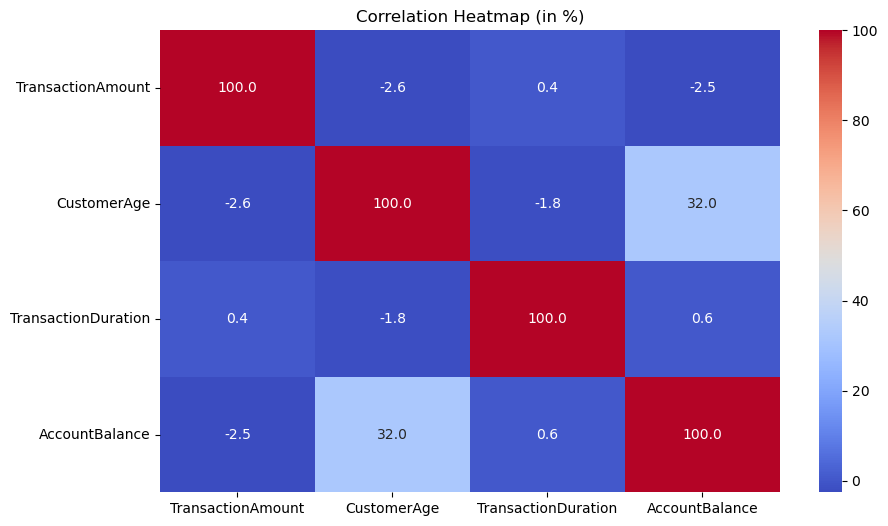

In [79]:
corr = df_numeric.corr() * 100   # ubah ke persen

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,              # tampilkan angkanya
    fmt=".1f",               # 1 angka desimal
    cmap="coolwarm"
)
plt.title("Correlation Heatmap (in %)")
plt.show()

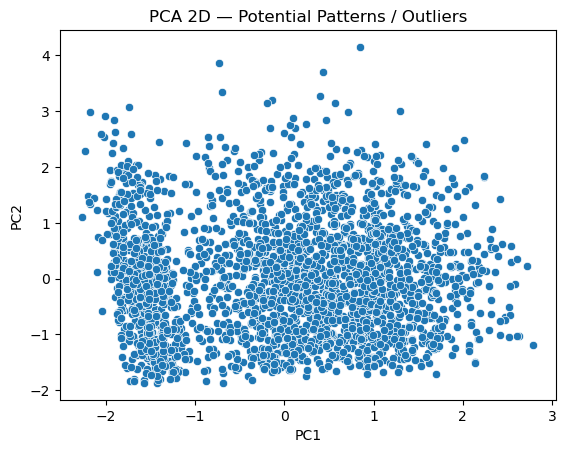

In [80]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaled = StandardScaler().fit_transform(df_numeric)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

df['PC1'], df['PC2'] = pca_data[:, 0], pca_data[:, 1]

sns.scatterplot(data=df, x='PC1', y='PC2')
plt.title("PCA 2D — Potential Patterns / Outliers")
plt.show()



1. Mayoritas titik membentuk **sebaran padat di tengah**

Artinya:

* sebagian besar nasabah memiliki pola transaksi yang **mirip** / **normal**
* tidak ada cluster alami yang terlalu jelas (belum tampak segmentasi user)

2. Ada titik **menyebar jauh dari kerumunan**

Contohnya titik:

* sangat tinggi ke atas
* jauh ke kiri
* jauh ke kanan

Titik-titik ini kemungkinan **outlier** atau **perilaku anomali transaksi**, bisa mengarah ke:

* transaksi jumlah sangat besar
* durasi transaksi tidak wajar (super cepat / super lama)
* kombinasi saldo & transaksi tidak biasa
* akun jarang transaksi lalu tiba-tiba besar


### **Multivariate analysis (categorical features)**

In [81]:
import pandas as pd
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    phi2 = chi2 / n
    r, k = confusion.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1),(r_corr-1)))

corr_matrix = pd.DataFrame(
    [[cramers_v(df_categorical[col_i], df_categorical[col_j]) for col_j in df_categorical.columns] for col_i in df_categorical.columns],
    columns=df_categorical.columns,
    index=df_categorical.columns
)
corr_matrix

,TransactionType,Location,Channel,CustomerOccupation
TransactionType,0.998862,0.0,0.231788,0.0
Location,0.000000,1.0,0.000000,0.0
Channel,0.231788,0.0,1.000000,0.0
CustomerOccupation,0.000000,0.0,0.000000,1.0


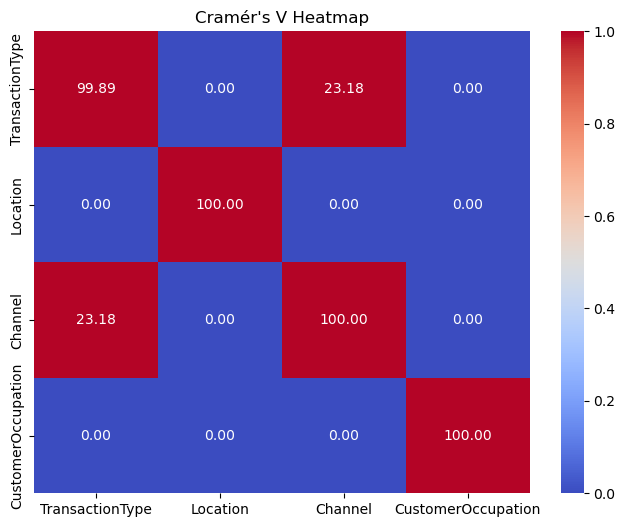

In [83]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix * 100, annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1)
plt.title("Cramér's V Heatmap")
plt.show()


## **Feature engineering**

# **Modeling**

# **Evaluation**

# Deployment